In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
import os
import re
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from torchvision.transforms import Normalize
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [52]:
# Set the device for computation (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [53]:
class CNN(nn.Module): # results in accuracy of 73.22%
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.2)

    def forward(self, x):
        x = self.pool(self.leaky_relu(self.conv1(x)))
        x = self.pool(self.leaky_relu(self.conv2(x)))
        x = self.pool(self.leaky_relu(self.conv3(x)))
        x = self.pool(self.leaky_relu(self.conv4(x)))
        x = self.pool(self.leaky_relu(self.conv5(x)))
        x = x.view(-1, 256 * 2 * 2)
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.leaky_relu(self.fc3(x))
        x = self.leaky_relu(self.fc4(x))
        x = self.fc5(x)
        return x

Epoch 1 - Training Loss: 2965.524683 - Validation Loss: 213.632605 - Learning Rate: 0.001
Epoch 1 completed.
Epoch 2 - Training Loss: 575.700748 - Validation Loss: 233.706334 - Learning Rate: 0.001
Epoch 2 completed.
Epoch 3 - Training Loss: 453.968927 - Validation Loss: 322.837631 - Learning Rate: 0.001
Epoch 3 completed.
Epoch 4 - Training Loss: 464.627847 - Validation Loss: 285.016591 - Learning Rate: 0.001
Epoch 4 completed.
Epoch 5 - Training Loss: 458.084766 - Validation Loss: 224.195022 - Learning Rate: 0.001
Epoch 5 completed.


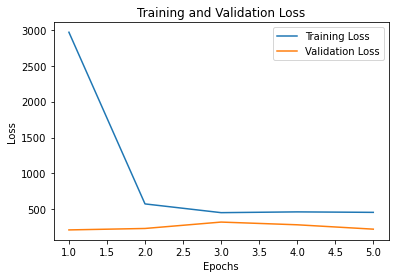

Accuracy for Train_510: 1.59%
Epoch 1 - Training Loss: 3013.224207 - Validation Loss: 2539.829169 - Learning Rate: 0.001
Epoch 1 completed.
Epoch 2 - Training Loss: 1159.385071 - Validation Loss: 453.885000 - Learning Rate: 0.001
Epoch 2 completed.
Epoch 3 - Training Loss: 523.630403 - Validation Loss: 225.935047 - Learning Rate: 0.001
Epoch 3 completed.
Epoch 4 - Training Loss: 512.994594 - Validation Loss: 212.291528 - Learning Rate: 0.001
Epoch 4 completed.
Epoch 5 - Training Loss: 456.953502 - Validation Loss: 222.892697 - Learning Rate: 0.001
Epoch 5 completed.


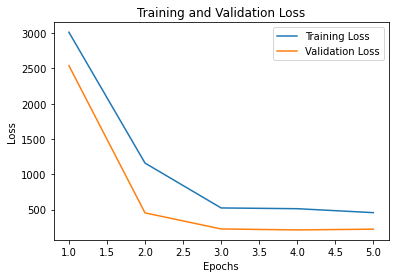

Accuracy for Train_1020: 4.76%
Epoch 1 - Training Loss: 1031.859122 - Validation Loss: 373.851061 - Learning Rate: 0.001
Epoch 1 completed.
Epoch 2 - Training Loss: 488.611053 - Validation Loss: 221.722453 - Learning Rate: 0.001
Epoch 2 completed.
Epoch 3 - Training Loss: 387.264642 - Validation Loss: 265.790647 - Learning Rate: 0.001
Epoch 3 completed.
Epoch 4 - Training Loss: 349.146491 - Validation Loss: 189.201779 - Learning Rate: 0.001
Epoch 4 completed.
Epoch 5 - Training Loss: 319.300722 - Validation Loss: 130.111200 - Learning Rate: 0.001
Epoch 5 completed.


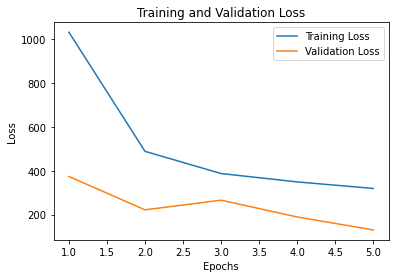

Accuracy for Train_2040: 4.82%
Epoch 1 - Training Loss: 936.232597 - Validation Loss: 211.993832 - Learning Rate: 0.001
Epoch 1 completed.
Epoch 2 - Training Loss: 414.607282 - Validation Loss: 191.009261 - Learning Rate: 0.001
Epoch 2 completed.
Epoch 3 - Training Loss: 270.168796 - Validation Loss: 32.822951 - Learning Rate: 0.001
Epoch 3 completed.
Epoch 4 - Training Loss: 168.698764 - Validation Loss: 70.869542 - Learning Rate: 0.001
Epoch 4 completed.
Epoch 5 - Training Loss: 144.373717 - Validation Loss: 8.910611 - Learning Rate: 0.001
Epoch 5 completed.


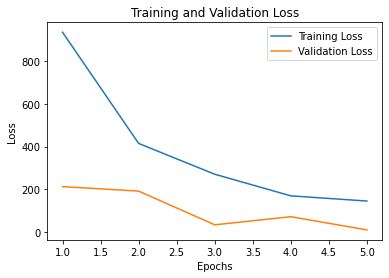

Accuracy for Train_4080: 32.91%
[1,   100] loss: 883.745212
Epoch 1 - Training Loss: 143.397155 - Validation Loss: 212.735813 - Learning Rate: 0.001
Epoch 1 completed.
[2,   100] loss: 367.789772
Epoch 2 - Training Loss: 89.160461 - Validation Loss: 70.396065 - Learning Rate: 0.001
Epoch 2 completed.
[3,   100] loss: 154.851293
Epoch 3 - Training Loss: 42.300555 - Validation Loss: 6.841605 - Learning Rate: 0.001
Epoch 3 completed.
[4,   100] loss: 106.491515
Epoch 4 - Training Loss: 35.132465 - Validation Loss: 15.311786 - Learning Rate: 0.001
Epoch 4 completed.
[5,   100] loss: 89.053723
Epoch 5 - Training Loss: 30.043697 - Validation Loss: 8.979407 - Learning Rate: 0.001
Epoch 5 completed.


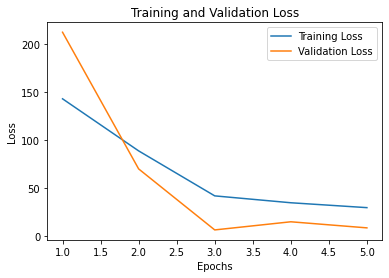

Accuracy for Train_8160: 25.00%
[1,   100] loss: 1102.259384
Epoch 1 - Training Loss: 203.091818 - Validation Loss: 201.293409 - Learning Rate: 0.001
Epoch 1 completed.
[2,   100] loss: 321.294754
Epoch 2 - Training Loss: 93.379689 - Validation Loss: 14.182681 - Learning Rate: 0.001
Epoch 2 completed.
[3,   100] loss: 154.421471
Epoch 3 - Training Loss: 60.886604 - Validation Loss: 14.228775 - Learning Rate: 0.001
Epoch 3 completed.
[4,   100] loss: 119.212037
Epoch 4 - Training Loss: 49.693434 - Validation Loss: 4.670572 - Learning Rate: 0.001
Epoch 4 completed.
[5,   100] loss: 101.639589
Epoch 5 - Training Loss: 41.605202 - Validation Loss: 2.808884 - Learning Rate: 0.001
Epoch 5 completed.


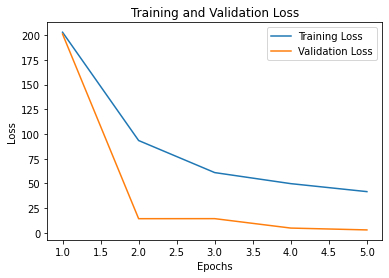

Accuracy for Train_10200: 13.08%


In [54]:
# Create training dataset
# Set up the data directories
sets = ['Train_510', 'Train_1020', 'Train_2040', 'Train_4080', 'Train_8160', 'Train_10200']
best_train_losses = {}  # Dictionary to store the best training loss for each item
best_val_losses = {}  # Dictionary to store the best validation loss for each item
accuracy = []
for item in sets:
    data_dir = 'Test_Images'
    train_dir = os.path.join(data_dir, item)

    # Define a function to get the labels from the image filenames
    def get_label(filename):
        match = re.search(r'\d+\.?\d*', filename)
        if match:
            return float(match.group())
        else:
            return None

    # Define a list to store the image filenames and labels
    train_data = []

    # Iterate over the training images and add them to the list
    for filename in os.listdir(train_dir):
        label = get_label(filename)
        if label is not None:
            train_data.append([os.path.join(train_dir, filename), label])

    # Convert the list to a dataframe
    train_df = pd.DataFrame(train_data, columns=['filename', 'label'])

    # Save the dataframe to a CSV file
    train_df.to_csv(os.path.join(data_dir, item+'.csv'), index=False)

class CustomImageDataset(Dataset):
    def __init__(self, csv_file, image_folder, transform=None):
        self.data = self._load_data(csv_file)
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image_path, label = self.data[index]
        image = Image.open(image_path).convert("RGB")

        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def _load_data(self, csv_file):
        data = []
        with open(csv_file, 'r') as file:
            lines = file.readlines()
            for line in lines[1:]:
                image_path, label = line.strip().split(',')
                data.append((image_path, float(label)))
        return data

transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.4753, 0.4753, 0.4753])
])

for item in sets:
    csv_file = f'Test_Images/{item}.csv'
    image_folder = f'Test_Images/{item}'

    dataset = CustomImageDataset(csv_file, image_folder, transform=transform)

    train_size = int(0.6 * len(dataset))
    val_size = int(0.2 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

    num_epochs = 5
    best_val_loss = float('inf')
    best_learning_rate = None
    patience = 5
    counter = 0
    learning_rate = 0.001

    train_losses = []
    val_losses = []
    epoch_numbers = []
    item_train_losses = []  # List to store training losses for the current item
    item_val_losses = []  # List to store validation losses for the current item

    model = CNN().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        running_loss = 0.0

        model.train()
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad()
            inputs = inputs.to(device)  # Move inputs to the device
            labels = labels.to(device)  # Move labels to the device
            outputs = model(inputs)
            labels = labels.unsqueeze(1)
            loss = criterion(outputs, labels.float())

            l1_lambda = 0.01
            l1_regularization = torch.tensor(0.).to(device)
            for param in model.parameters():
                l1_regularization += torch.norm(param, 1).to(device)
            loss += l1_lambda * l1_regularization

            l2_lambda = 0.01
            l2_regularization = torch.tensor(0.).to(device)
            for param in model.parameters():
                l2_regularization += torch.norm(param, 2).to(device)
            loss += l2_lambda * l2_regularization

            running_loss += loss.item()

            loss.backward()
            optimizer.step()

            if i % 100 == 99:
                print('[%d, %5d] loss: %.6f' % (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0

        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            val_samples = 0
            for inputs, labels in val_loader:
                inputs = inputs.to(device)  # Move inputs to the device
                labels = labels.to(device)  # Move labels to the device
                outputs = model(inputs)
                labels = labels.unsqueeze(1)
                loss = criterion(outputs, labels.float())
                val_loss += loss.item() * inputs.size(0)
                val_samples += inputs.size(0)

            average_val_loss = val_loss / val_samples

            train_losses.append(running_loss / len(train_loader))
            val_losses.append(average_val_loss)
            item_train_losses.append(running_loss / len(train_loader))
            item_val_losses.append(average_val_loss)

            epoch_numbers.append(epoch + 1)
            print('Epoch %d - Training Loss: %.6f - Validation Loss: %.6f - Learning Rate: %.3f' % (epoch + 1, running_loss / len(train_loader), average_val_loss, learning_rate))

        if average_val_loss < best_val_loss:
            best_val_loss = average_val_loss
            counter = 0
            torch.save(model.state_dict(), f'trained_model_{item}.pt')

        else:
            counter += 1
            if counter >= patience:
                print('No improvement in validation loss. Early stopping.')
                break

        print('Epoch %d completed.' % (epoch + 1))

    best_train_loss = min(item_train_losses)
    best_train_losses[item] = best_train_loss

    best_val_loss = min(item_val_losses)
    best_val_losses[item] = best_val_loss
    # Plotting the losses
    # epochs = range(1, num_epochs + 1)
    plt.plot(epoch_numbers, train_losses, label='Training Loss')
    plt.plot(epoch_numbers, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.savefig(f'loss_plot_{item}.jpeg', format='jpeg')
    plt.show()
    
    # Create a DataFrame to store the predictions
    predictions_test_df = pd.DataFrame(columns=['Real Value', 'Predicted Value', 'Difference'])

    model = CNN().to(device)  # Instantiate a new instance of the CNN class
    model.load_state_dict(torch.load(f'trained_model_{item}.pt'))  # Load the state dictionary of the pre-trained model

    # Set the model to evaluation mode
    model.eval()

    # Initialize variables for tracking correct predictions and total samples
    correct_predictions = 0
    total_samples = 0

    # Define the range for considering a prediction as correct
    max_range = 0.5

    # Iterate over the test data
    for sample in test_loader:

        # Move the input data to the device
        inputs = sample[0].to(device)  # Assuming the input images are the first element in each sample
        labels = sample[1].to(device)  # Assuming the labels are the second element in each sample

        # Forward pass through the model
        with torch.no_grad():
            predicted_values = model(inputs).squeeze().tolist()

        # Get the predicted labels
        predicted_labels = outputs  # Assuming the model output is a single scalar value

        
    # Iterate over the predicted values and add them to the DataFrame
        for i in range(len(predicted_values)):
            real_value = labels[i].item()
            predicted_value = predicted_values[i]

            # Check if the predicted value is within the desired range (40-70)
            if real_value >= 40 and real_value <= 70:
                # Calculate the difference between predicted and real value
                difference = predicted_value - real_value

                # Create a new DataFrame with the row to be appended
                new_row = pd.DataFrame({'Real Value': real_value, 'Predicted Value': predicted_value, 'Difference': difference}, index=[0])

                # Concatenate the new row with the existing DataFrame
                predictions_test_df = pd.concat([predictions_test_df, new_row], ignore_index=True)

                # Check if the prediction is correct within the desired range
                if abs(real_value - predicted_value) <= max_range:
                    correct_predictions += 1


    # Calculate the accuracy
    accuracy_value = correct_predictions / (len(predictions_test_df)-1)
    accuracy.append(accuracy_value)

    # Print the accuracy
    print(f"Accuracy for {item}: {accuracy_value * 100:.2f}%")
    
# for item in sets:
#     print(f"Item: {item}")
#     print(f"Best Validation Loss: {best_val_losses[item]}")
#     print(f"Best Training Loss: {best_train_losses[item]}")
#     print(f"Accuracy for {item}: {accuracy_value * 100:.2f}%")

In [55]:
for i, item in enumerate(sets):
    print(f"Item: {item}")
    print(f"Best Validation Loss: {best_val_losses[item]}")
    print(f"Best Training Loss: {best_train_losses[item]}")
    print(f"Accuracy for {item}: {accuracy[i] * 100:.2f}%")

Item: Train_510
Best Validation Loss: 213.63260545917586
Best Training Loss: 453.96892700195315
Accuracy for Train_510: 1.59%
Item: Train_1020
Best Validation Loss: 212.29152843998926
Best Training Loss: 456.95350189208983
Accuracy for Train_1020: 4.76%
Item: Train_2040
Best Validation Loss: 130.11120022044463
Best Training Loss: 319.30072217109876
Accuracy for Train_2040: 4.82%
Item: Train_4080
Best Validation Loss: 8.910611105900184
Best Training Loss: 144.37371736997133
Accuracy for Train_4080: 32.91%
Item: Train_8160
Best Validation Loss: 6.841605207499335
Best Training Loss: 30.043697332245074
Accuracy for Train_8160: 25.00%
Item: Train_10200
Best Validation Loss: 2.8088838380925796
Best Training Loss: 41.60520191987356
Accuracy for Train_10200: 13.08%


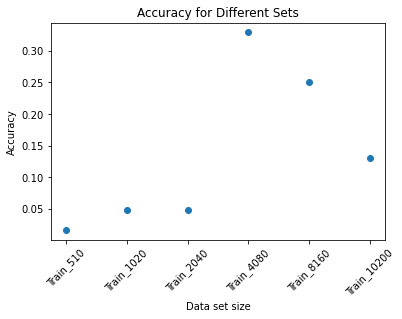

In [56]:
plt.scatter(sets, accuracy)
plt.xlabel('Data set size')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Sets')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.savefig('Accuracy per data set.jpeg', format='jpeg')
plt.show()

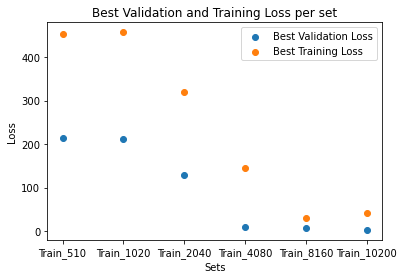

In [57]:
# Prepare data for scatter plot
x_values = sets
y_val_losses = [best_val_losses[item] for item in sets]
y_train_losses = [best_train_losses[item] for item in sets]

# Create scatter plot
plt.scatter(x_values, y_val_losses, label='Best Validation Loss')
plt.scatter(x_values, y_train_losses, label='Best Training Loss')

# Set labels and title
plt.xlabel('Sets')
plt.ylabel('Loss')
plt.title('Best Validation and Training Loss per set')

# Add legend
plt.legend()

# Save the plot
plt.savefig('Best_losses_per_set.jpeg', format='jpeg')

# Show the plot
plt.show()

